## Assignment
Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Build a Classifier

In [140]:
# load amazon review data
source = pd.read_csv('~/Desktop/Data_Science/sentiment/amazon_cells_labelled.txt', sep='\t', names=['text', 'rating'])

In [141]:
source.head()

,text,rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [142]:
keywords = ['good', 'great', 'impressed', 'recommend', 'excellent', 'awesome', 'like', 'best', 'nice', 'love', \
            'pleased', 'glad', 'incredible', 'well']

In [143]:
capKeywords = []
bigKeywords = []

#make each keyword a feature
for key in keywords:
    source[str(key)] = source.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )  
    
#make feature of each keyword capitalized
for word in keywords:
    word = str(word).capitalize()
    capKeywords.append(str(word))
    source[str(word)] = source.text.str.contains(
        str(word) + ' ',
        case=False
    )
    
#make feature of each keyword in all caps
for word in keywords:
    word = str(word).upper()
    bigKeywords.append(str(word))
    source[str(word)] = source.text.str.contains(
        str(word) + ' ',
        case=False
    )

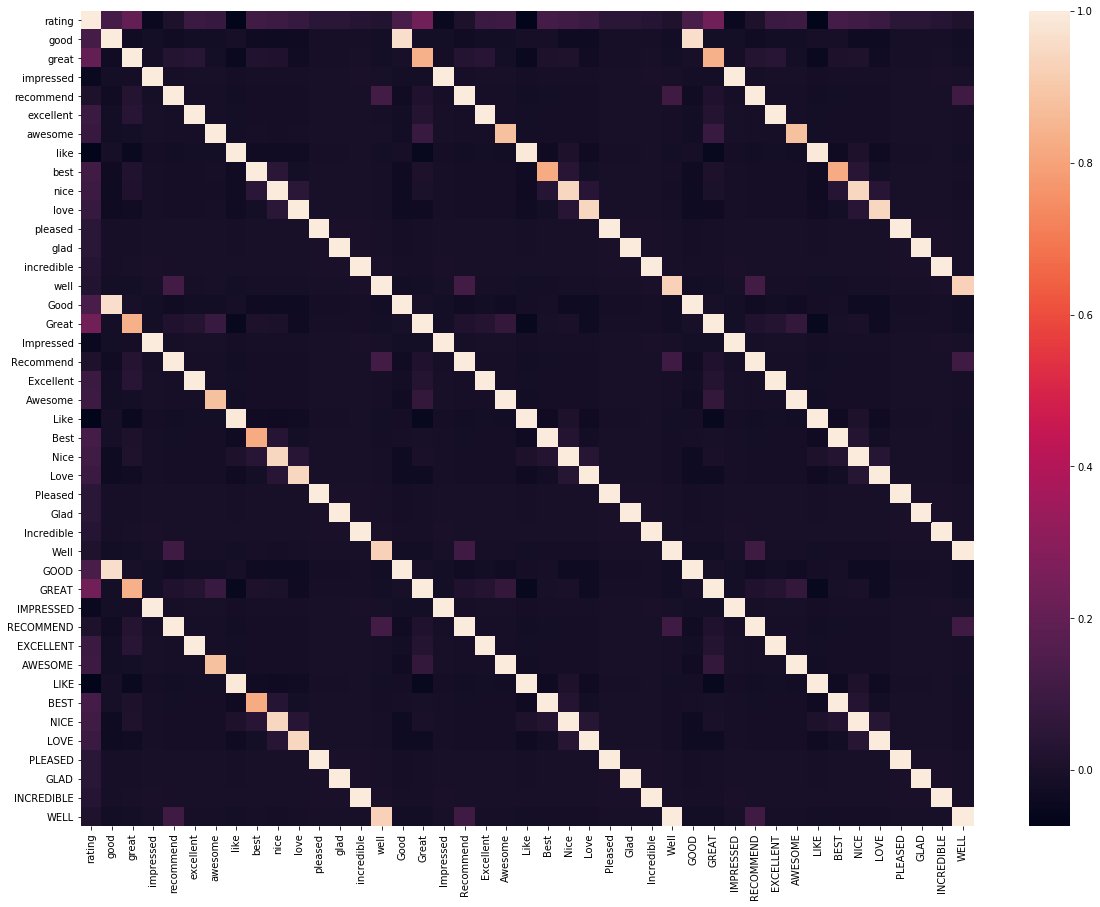

In [155]:
plt.figure(figsize=(20,15))
sns.heatmap(source.corr())

In [145]:
data = source[keywords + capKeywords + bigKeywords]
target = source['rating']

In [146]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 302


In [148]:
#establish list of features
Features = keywords + capKeywords + bigKeywords

#initiate dataframe
FeatureCorrelations = pd.DataFrame()

#add row for each feature
FeatureCorrelations['Feature'] = Features

#add column with correlation value for each feature
FeatureCorrelations['Correlations'] = FeatureCorrelations['Feature'].apply(lambda x: source[x].corr(target))

#sort dataframe by correlation
FeatureCorrelations.reindex(FeatureCorrelations.Correlations.abs().sort_values(ascending=False).index)

,Feature,Correlations
15,Great,0.251067
29,GREAT,0.251067
1,great,0.173537
28,GOOD,0.160518
14,Good,0.160518
37,LOVE,0.146460
23,Love,0.146460
22,Nice,0.139169
36,NICE,0.139169
21,Best,0.135388


### Test on another dataset

In [162]:
def Classifier(source, keywords):

    capKeywords = []
    bigKeywords = []

    #make each keyword a feature
    for key in keywords:
        source[str(key)] = source.text.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )  
    
    #make feature of each keyword capitalized
    for word in keywords:
        word = str(word).capitalize()
        capKeywords.append(str(word))
        source[str(word)] = source.text.str.contains(
            str(word) + ' ',
            case=False
        )
    
    #make feature of each keyword in all caps
    for word in keywords:
        word = str(word).upper()
        bigKeywords.append(str(word))
        source[str(word)] = source.text.str.contains(
            str(word) + ' ',
            case=False
        )
    
    data = source[keywords + capKeywords + bigKeywords]
    target = source['rating']
    
       # Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0],
        (target != y_pred).sum()
    ))

In [170]:
def CorrTest(source, keywords):
    #establish list of features
    Features = keywords + capKeywords + bigKeywords

    #initiate dataframe
    FeatureCorrelations = pd.DataFrame()

    #add row for each feature
    FeatureCorrelations['Feature'] = Features

    #add column with correlation value for each feature
    FeatureCorrelations['Correlations'] = FeatureCorrelations['Feature'].apply(lambda x: source[x].corr(target))

    #sort dataframe by correlation
    return FeatureCorrelations.reindex(FeatureCorrelations.Correlations.abs().sort_values(ascending=False).index)

In [166]:
# load yelp review data
yelp = pd.read_csv('~/Desktop/Data_Science/sentiment/yelp_labelled.txt', sep='\t', names=['text', 'rating'])

In [167]:
Classifier(yelp, keywords)

Number of mislabeled points out of a total 1000 points : 356


In [171]:
CorrTest(yelp, keywords)

,Feature,Correlations
29,GREAT,0.236572
15,Great,0.236572
1,great,0.198749
14,Good,0.134744
28,GOOD,0.134744
21,Best,0.122713
35,BEST,0.122713
0,good,0.121781
36,NICE,0.109870
22,Nice,0.109870


In [172]:
# load yelp review data
imdb = pd.read_csv('~/Desktop/Data_Science/sentiment/imdb_labelled.txt', sep='\t', names=['text', 'rating'])

In [173]:
Classifier(imdb, keywords)

Number of mislabeled points out of a total 748 points : 318


In [174]:
CorrTest(imdb, keywords)

,Feature,Correlations
16,Impressed,-0.041628
2,impressed,-0.041628
30,IMPRESSED,-0.041628
22,Nice,0.039014
36,NICE,0.039014
8,nice,0.039014
5,awesome,0.032158
33,AWESOME,0.032158
19,Awesome,0.032158
39,GLAD,-0.029541
